Training a single Neuron on Binary OR data and Breast Cancer Dataset 

Training for Binary OR

In [35]:
import numpy as np

In [36]:
# Testing your code:
# learn the binary OR function
# we added an extra 1 to remove bias
# you can try removing the extra 1 to see how the accuracy is affected.
OR_X = np.array([[0,0,1], [0,1,1],[1,0,1],[1,1,1]])
OR_Y = np.array([0,1,1,1])
#perceptron_training(OR_X,OR_Y, .2, 100)
print(OR_X)



[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]


In [56]:
#initializing the weights for the neuron
def InitWeight(X):
    W = np.random.rand(X.shape[1])
    return W
W = InitWeight(OR_X)
W

array([0.70175399, 0.57615704, 0.86172406])

In [65]:
#weighted sum is the same as the dot product of the two matrices 
def WeightedSUM(W,X):
    w_sum = np.dot(X,W)
    return w_sum
t1 = np.array([1,1,1])
t2 = np.array([2,2,2])
print(WeightedSUM(t1, t2))

6


In [58]:
def UnitStep(w_sum):
    return 1 if w_sum >= 0 else 0

In [59]:
def ComputeError(Y, Y_pred):
    return Y - Y_pred

In [60]:
def UpdateWeight(w,eta,error,x):
    return w + eta*error*x

In [61]:
def ComputeAccuracy(X,Y,w):
    correct_predictions = 0
    for x,y in zip(X,Y):
        w_sum = WeightedSUM(w,x)
        y_pred = UnitStep(w_sum)
        if y_pred == y:
            correct_predictions +=1
    return correct_predictions/len(Y)


In [62]:
import matplotlib.pyplot as plt
def PlotAccuracy(accuracy):
    plt.plot(accuracy)

In [63]:
def perceptron_training(X,Y, eta, epochs):
    
    #Task 1: randomly initialize the weights  
    w = InitWeight(X) 
    
    accuracy = []
    # Run iterations
    for i in range(epochs):
        # in every iteration train for every training examples
        for x, y in zip(X, Y):
            
            # Task 2: Compute weighted sum based on w and x
            w_sum = WeightedSUM(w,x)
            # Task 3: Use a step function to get the predicted output 
            y_pred = UnitStep(w_sum) 
            # Task 3: Compute error (predicted-expected output)
            error = ComputeError(y,y_pred) 
            # Task 4: update weights
            w = UpdateWeight(w,eta,error,x) 

        # Task 5: Compute accuracy of your current model
        # The accuracy computation is similar to the above operation (except that you don't update weights)
        # The accuracy should be normalized (0 <= accuracy <= 1)
        acc = ComputeAccuracy(X,Y,w)
        # write this ComputeAccuracy function (you can use WeightedSUM and UnitStep functions)
        accuracy.append(acc)
    PlotAccuracy(accuracy)
     


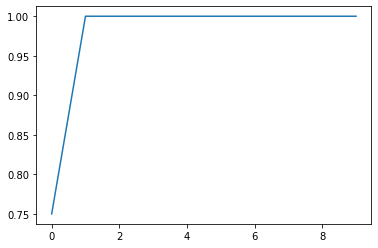

In [64]:
perceptron_training(OR_X, OR_Y, 0.5, 10)

Training one perceptrone on cancer dataset

In [66]:
import sklearn.datasets

# Load the breast cancer dataset
breast_cancer = sklearn.datasets.load_breast_cancer()

# Extract the data and target
X = breast_cancer.data
Y = breast_cancer.target

In [74]:
print(Y.shape[0])

569


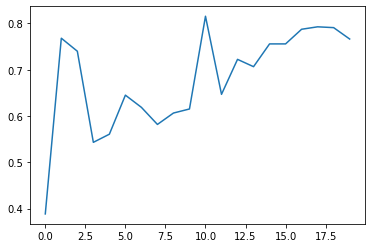

In [79]:
perceptron_training(X, Y, 0.001, 20)